In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import datetime as dt
import yfinance as yf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Preprocessing data

In [2]:
EURUSD = yf.Ticker("EURUSD=X")
EURUSD.info

{'maxAge': 86400,
 'priceHint': 4,
 'previousClose': 1.1423349,
 'open': 1.142596,
 'dayLow': 1.1392117,
 'dayHigh': 1.142596,
 'regularMarketPreviousClose': 1.1423349,
 'regularMarketOpen': 1.142596,
 'regularMarketDayLow': 1.1392117,
 'regularMarketDayHigh': 1.142596,
 'volume': 0,
 'regularMarketVolume': 0,
 'averageVolume': 0,
 'averageVolume10days': 0,
 'averageDailyVolume10Day': 0,
 'bid': 1.1412919,
 'ask': 1.1406411,
 'bidSize': 0,
 'askSize': 0,
 'fiftyTwoWeekLow': 1.0183818,
 'fiftyTwoWeekHigh': 1.1546544,
 'fiftyDayAverage': 1.084847,
 'twoHundredDayAverage': 1.0754839,
 'currency': 'USD',
 'tradeable': False,
 'quoteType': 'CURRENCY',
 'symbol': 'EURUSD=X',
 'language': 'en-US',
 'region': 'US',
 'typeDisp': 'Currency',
 'quoteSourceName': 'Delayed Quote',
 'triggerable': True,
 'customPriceAlertConfidence': 'HIGH',
 'regularMarketChange': -0.0010430813,
 'longName': 'EUR/USD',
 'shortName': 'EUR/USD',
 'regularMarketChangePercent': -0.09131532,
 'regularMarketPrice': 1.141

In [3]:
EA_values = EURUSD.history(start = '2005-01-01', end = '2025-04-20')
EA_values 

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2005-01-03 00:00:00+00:00,1.358105,1.358105,1.340195,1.347001,0,0.0,0.0
2005-01-04 00:00:00+00:00,1.347001,1.349601,1.326102,1.328198,0,0.0,0.0
2005-01-05 00:00:00+00:00,1.328304,1.330300,1.322297,1.328004,0,0.0,0.0
2005-01-06 00:00:00+00:00,1.327898,1.327898,1.316396,1.318305,0,0.0,0.0
2005-01-07 00:00:00+00:00,1.318200,1.324802,1.302999,1.306097,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-04-11 00:00:00+01:00,1.125784,1.147184,1.125087,1.125784,0,0.0,0.0
2025-04-14 00:00:00+01:00,1.134314,1.142478,1.129969,1.134314,0,0.0,0.0
2025-04-15 00:00:00+01:00,1.133967,1.137786,1.128566,1.133967,0,0.0,0.0


In [4]:
EA_values.index = pd.to_datetime(EA_values.index)
EA_values.reset_index(inplace = True)
closedf = EA_values[['Date', 'Close']]

In [5]:
closedf

,Date,Close
0,2005-01-03 00:00:00+00:00,1.347001
1,2005-01-04 00:00:00+00:00,1.328198
2,2005-01-05 00:00:00+00:00,1.328004
3,2005-01-06 00:00:00+00:00,1.318305
4,2005-01-07 00:00:00+00:00,1.306097
...,...,...
5260,2025-04-11 00:00:00+01:00,1.125784
5261,2025-04-14 00:00:00+01:00,1.134314
5262,2025-04-15 00:00:00+01:00,1.133967
5263,2025-04-16 00:00:00+01:00,1.129267


In [7]:
print(closedf['Date'].dtype)

datetime64[ns, Europe/London]


In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
closedf['Close'] = scaler.fit_transform(np.array(closedf['Close']).reshape(-1, 1))
print(closedf) 

                          Date     Close
0    2005-01-03 00:00:00+00:00  0.606062
1    2005-01-04 00:00:00+00:00  0.576644
2    2005-01-05 00:00:00+00:00  0.576340
3    2005-01-06 00:00:00+00:00  0.561166
4    2005-01-07 00:00:00+00:00  0.542067
...                        ...       ...
5260 2025-04-11 00:00:00+01:00  0.259966
5261 2025-04-14 00:00:00+01:00  0.273312
5262 2025-04-15 00:00:00+01:00  0.272768
5263 2025-04-16 00:00:00+01:00  0.265416
5264 2025-04-17 00:00:00+01:00  0.281705

[5265 rows x 2 columns]


C:\Users\Admin\AppData\Local\Temp\ipykernel_16976\3353778535.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closedf['Close'] = scaler.fit_transform(np.array(closedf['Close']).reshape(-1, 1))


# Create train and test data

In [7]:
split_index = int(len(closedf) * 0.8)

train_data = closedf.iloc[:split_index]
test_data = closedf.iloc[split_index:]

train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (4212, 2)
test_data:  (1053, 2)


In [8]:
def create_dataset(data, time_step=15):
    X, y = [], []
    prices = data['Close'].values 

    for i in range(len(prices) - time_step):
        X.append(prices[i:i+time_step])      
        y.append(prices[i + time_step])       

    return np.array(X), np.array(y)

In [9]:
time_step = 15

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train:", X_train.shape) 
print("y_train:", y_train.shape)  
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (4197, 15)
y_train: (4197,)
X_test: (1038, 15)
y_test: (1038,)


# SVR

In [10]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e2, gamma= 'scale')
svr_rbf.fit(X_train, y_train)

SVR(C=100.0)

In [11]:
train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (4197, 1)
Test data prediction: (1038, 1)


In [22]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

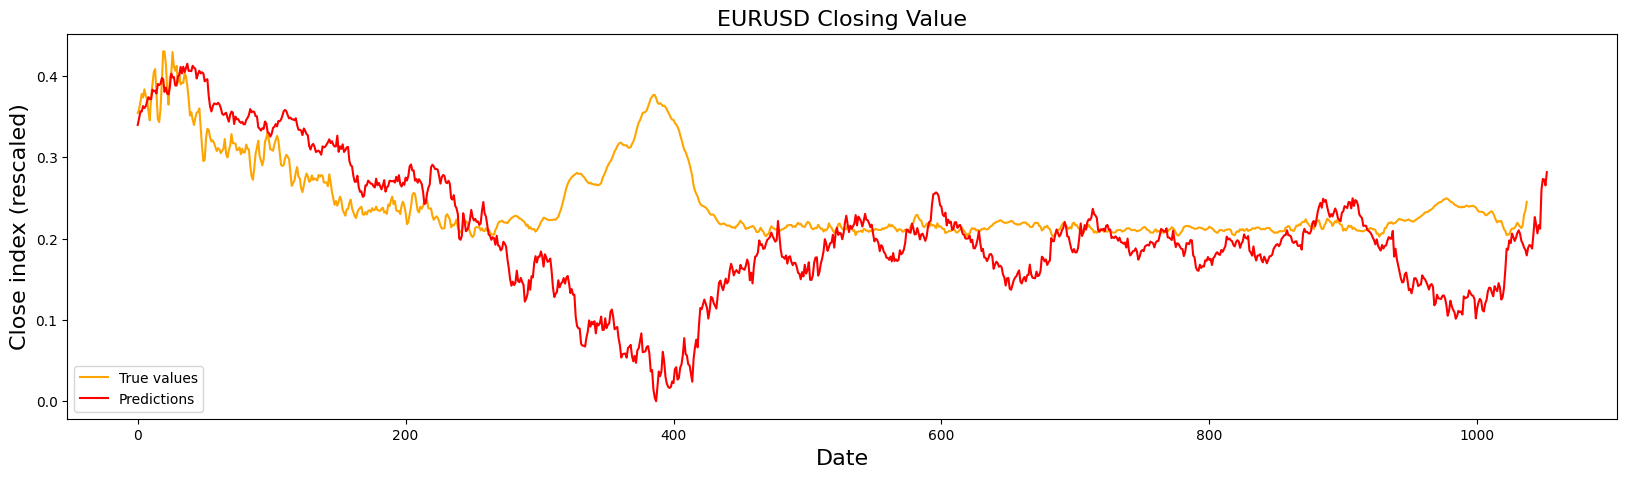

In [28]:
plt.figure(figsize=(20, 5))
plt.plot(test_predict, c='orange', label='True values')
plt.plot(test_data['Close'], c='r', linestyle='-', label='Predictions')
plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Close index (rescaled)", fontsize=16)
plt.title("EURUSD Closing Value", fontsize=16)
plt.show()

In [30]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data RMSE:  0.8011712442959829
Train data MSE:  0.6418753626867734
Train data MAE:  0.7972160497881889
Train data R2 score: -40.83890461115364
-------------------------------------------------------------------------------------
Test data RMSE:  0.849260579150858
Test data MSE:  0.7212435312996507
Test data MAE:  0.8472215190893387
Test data R2 score: -272.6987476964476


# RF

In [12]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 1200, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1200, random_state=0)

In [13]:
train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (4197, 1)
Test data prediction: (1038, 1)


In [14]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [21]:
last_input = closedf['Close'].values[-15:]
last_input = last_input.reshape(1, -1)  
future_preds_15 = []

for _ in range(100):
    next_pred = regressor.predict(last_input)  
    future_preds_15.append(next_pred[0])         

    last_input = np.append(last_input[:,1:], [[next_pred[0]]], axis=1)
future_preds_15 = np.array(future_preds_15).reshape(-1, 1)
future_preds_15_inv = scaler.inverse_transform(future_preds_15)

Text(0.5, 1.0, 'EURUSD Closing Value')

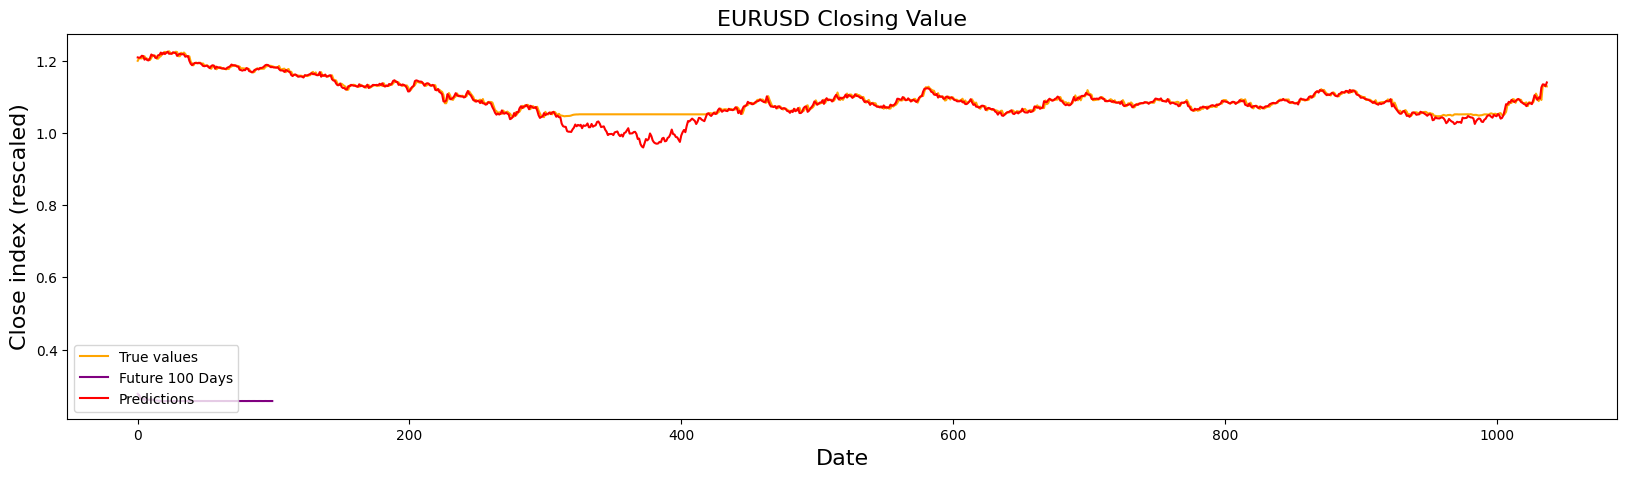

In [22]:
plt.figure(figsize=(20, 5))
plt.plot(test_predict, c='orange', label='True values',)
plt.plot(future_preds_15, label='Future 100 Days', color='purple')
plt.plot(original_ytest, c='r', linestyle='-', label='Predictions')
plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Close index (rescaled)", fontsize=16)
plt.title("EURUSD Closing Value", fontsize=16)

Text(0.5, 1.0, 'EURUSD Closing Value')

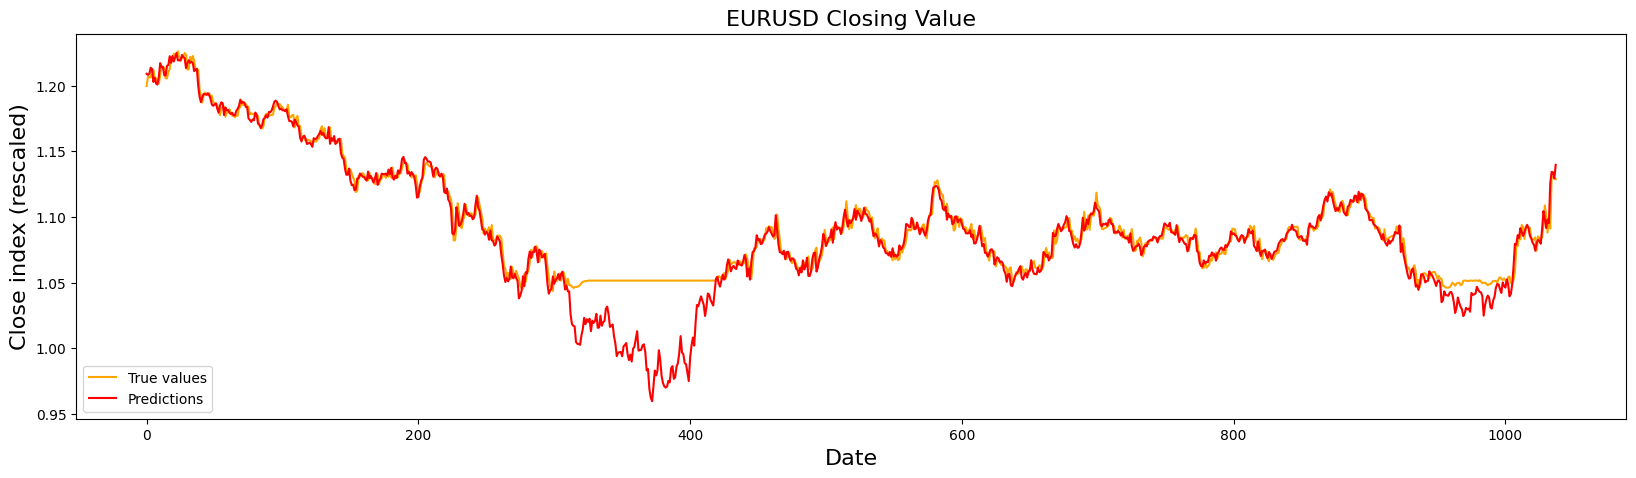

In [37]:
plt.figure(figsize=(20, 5))
plt.plot(test_predict, c='orange', label='True values')
plt.plot(original_ytest, c='r', linestyle='-', label='Predictions')
plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Close index (rescaled)", fontsize=16)
plt.title("EURUSD Closing Value", fontsize=16)

In [38]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data RMSE:  0.0036697077415108986
Train data MSE:  1.3466754908105021e-05
Train data MAE:  0.00227637808418159
Train data R2 score: 0.9991222061060834
-------------------------------------------------------------------------------------
Test data RMSE:  0.017319898827844443
Test data MSE:  0.00029997889540676724
Test data MAE:  0.008917314927204429
Test data R2 score: 0.886163487857911


# KNN

In [45]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [46]:
train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (4197, 1)
Test data prediction: (1038, 1)


In [54]:
time_step = 15
last_input = closedf['Close'].values[-time_step:]  
last_input = last_input.reshape(1, -1)  
future_preds = []

for _ in range(100):
    next_pred = neighbor.predict(last_input)  
    future_preds.append(next_pred[0])         

    last_input = np.append(last_input[:,1:], [[next_pred[0]]], axis=1)
future_preds = np.array(future_preds).reshape(-1, 1)
future_preds_inv = scaler.inverse_transform(future_preds)

In [48]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

Text(0.5, 1.0, 'EURUSD Closing Value')

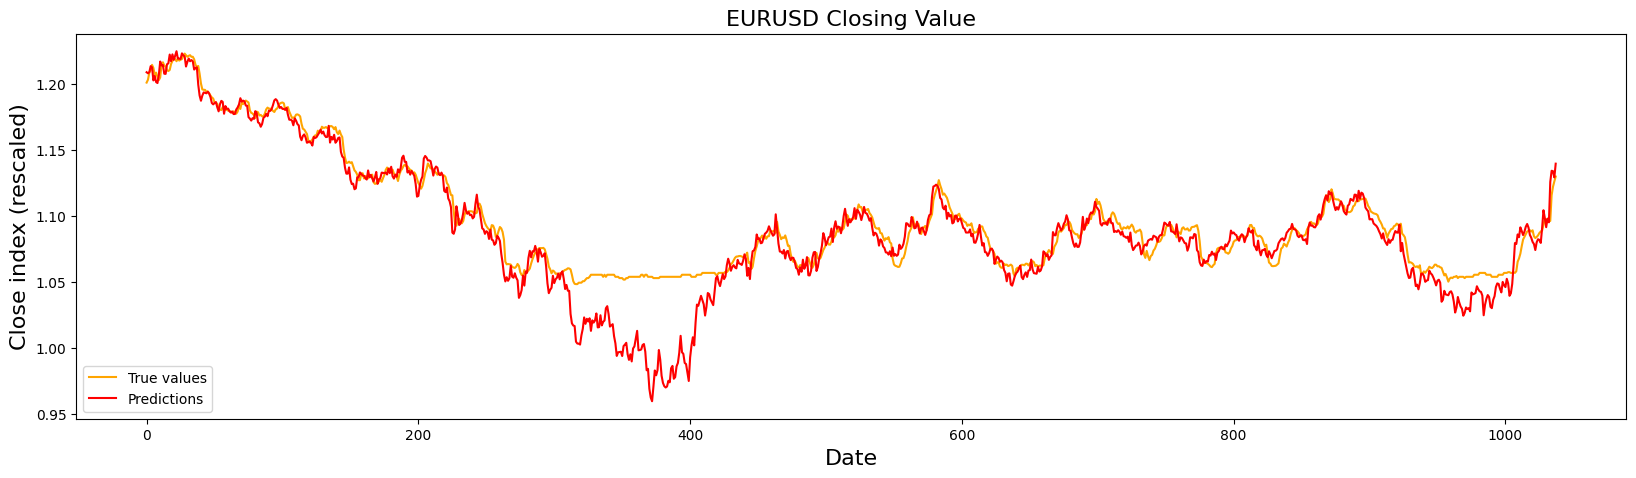

In [55]:
plt.figure(figsize=(20, 5))
plt.plot(test_predict, c='orange', label='True values',)
plt.plot(original_ytest, c='r', linestyle='-', label='Predictions')
plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Close index (rescaled)", fontsize=16)
plt.title("EURUSD Closing Value", fontsize=16)

Text(0.5, 1.0, 'EURUSD Closing Value')

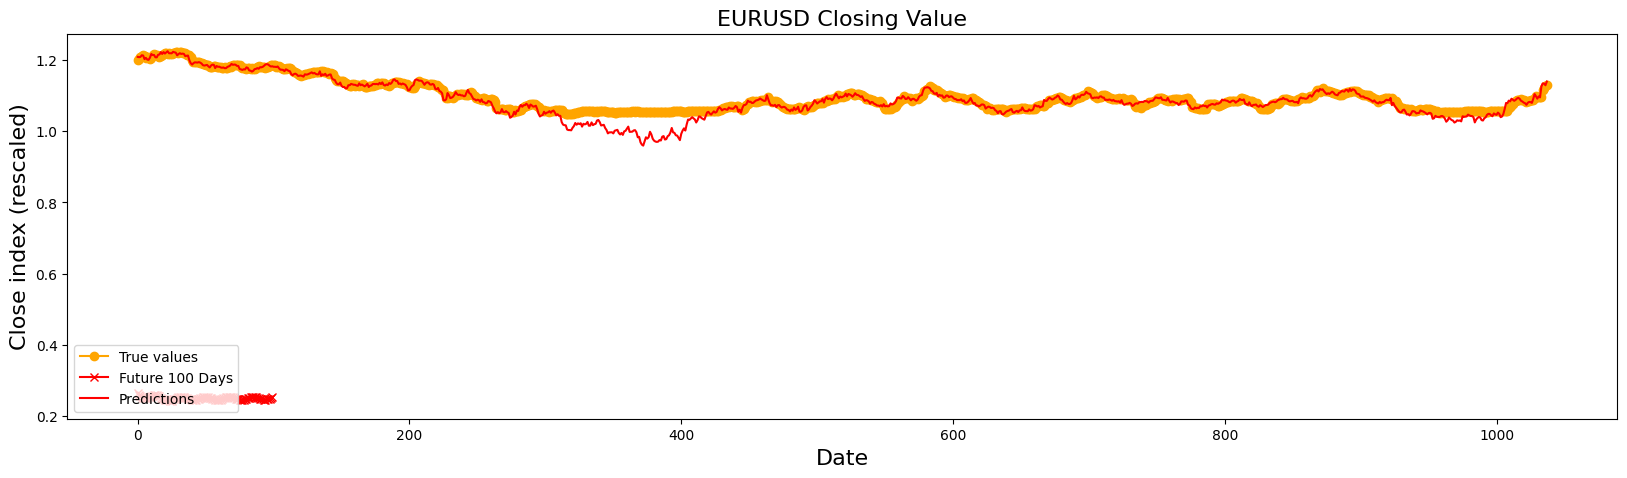

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(test_predict, c='orange', label='True values',)
plt.plot(future_preds, label='Future 100 Days', color='purple')
plt.plot(original_ytest, c='r', linestyle='-', label='Predictions')
plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Close index (rescaled)", fontsize=16)
plt.title("EURUSD Closing Value", fontsize=16)

In [43]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data RMSE:  0.01057859403204519
Train data MSE:  0.00011190665169482209
Train data MAE:  0.006986158434368184
Train data R2 score: 0.9927056684244507
-------------------------------------------------------------------------------------
Test data RMSE:  0.018945203516000184
Test data MSE:  0.0003589207362626658
Test data MAE:  0.011087102440587204
Test data R2 score: 0.8637961357374517
